In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("bc.csv")

In [4]:
df.shape

(699, 11)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [7]:
df[['0','10']]

,0,10
0,1000025,2
1,1002945,2
2,1015425,2
3,1016277,2
4,1017023,2
...,...,...
694,776715,2
695,841769,2
696,888820,4
697,897471,4


In [8]:
# Checking if any of the data is missing
df.isna().any().sum()

0

In [9]:
# Checking the data type of all columns
print(df.dtypes)

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

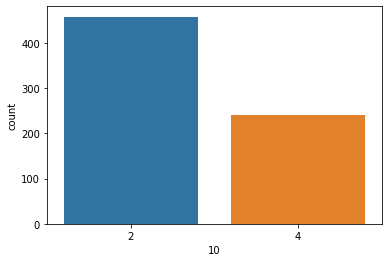

In [11]:
sns.countplot(data=df, x='10')

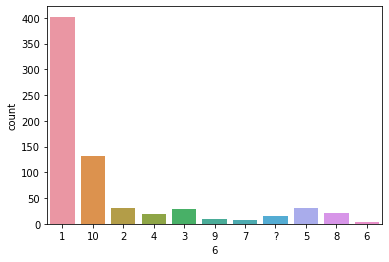

In [12]:
# Checking the data for column 6
sns.countplot(data=df , x='6')
plt.show()

In [13]:
# Dropping the row that contains '?' in the data
df = df[df['6'] != '?']

In [14]:
# Converting the data type of column 6 to integer
df['6'] = df['6'].astype(int)

In [15]:
print(df.dtypes)

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
dtype: object


In [16]:
# Finding the correlation between the attributes
df.corr().style.background_gradient(cmap="Blues")

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
1,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
2,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
3,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
4,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
5,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
6,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
7,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
8,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
9,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [17]:
# Dropping the column with less correlation
df = df.drop(columns='9')

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,10
0,1000025,5,1,1,1,2,1,3,1,2
1,1002945,5,4,4,5,7,10,3,2,2
2,1015425,3,1,1,1,2,2,3,1,2
3,1016277,6,8,8,1,3,4,3,7,2
4,1017023,4,1,1,3,2,1,3,1,2


In [19]:
# Normalizing data into between 0 - 1
def minmax_norm(df_input):
  return (df - df.min()) / (df.max() - df.min())

df_norm = minmax_norm(df)
print(df_norm)

            0         1         2         3         4         5         6  \
0    0.069946  0.444444  0.000000  0.000000  0.000000  0.111111  0.000000   
1    0.070164  0.444444  0.333333  0.333333  0.444444  0.666667  1.000000   
2    0.071096  0.222222  0.000000  0.000000  0.000000  0.111111  0.111111   
3    0.071160  0.555556  0.777778  0.777778  0.000000  0.222222  0.333333   
4    0.071216  0.333333  0.000000  0.000000  0.222222  0.111111  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
694  0.053270  0.222222  0.000000  0.000000  0.000000  0.222222  0.111111   
695  0.058128  0.111111  0.000000  0.000000  0.000000  0.111111  0.000000   
696  0.061642  0.444444  1.000000  1.000000  0.222222  0.666667  0.222222   
697  0.062288  0.333333  0.777778  0.555556  0.333333  0.222222  0.333333   
698  0.062288  0.333333  0.777778  0.777778  0.444444  0.333333  0.444444   

            7         8   10  
0    0.222222  0.000000  0.0  
1    0.222222

In [20]:
X = df_norm[['1','2','3','4','5','6','7','8']]
y = df_norm['10']

In [21]:
# splitting the data into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# PCA

In [22]:
# Logistic Regression Model fitting
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Accuracy for Naives Bayes Model
score = model.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.975609756097561


In [26]:
# Naives Bayes Model Fitting
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [27]:
# Accuracy for Naives Bayes Model
score = model.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.9853658536585366
